In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [294]:
df=pd.read_csv("/content/Bank Customer Churn Prediction.csv")

Data Overview

In [295]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [296]:
df.shape

(10000, 12)

In [297]:
df.columns.to_list()

['customer_id',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

In [298]:
df.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


Check Missing and Duplicate Values

In [299]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [300]:
df.duplicated().sum()

np.int64(0)

Basic Statistics

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [302]:
df.describe().round(2)

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


Correlation Heatmap

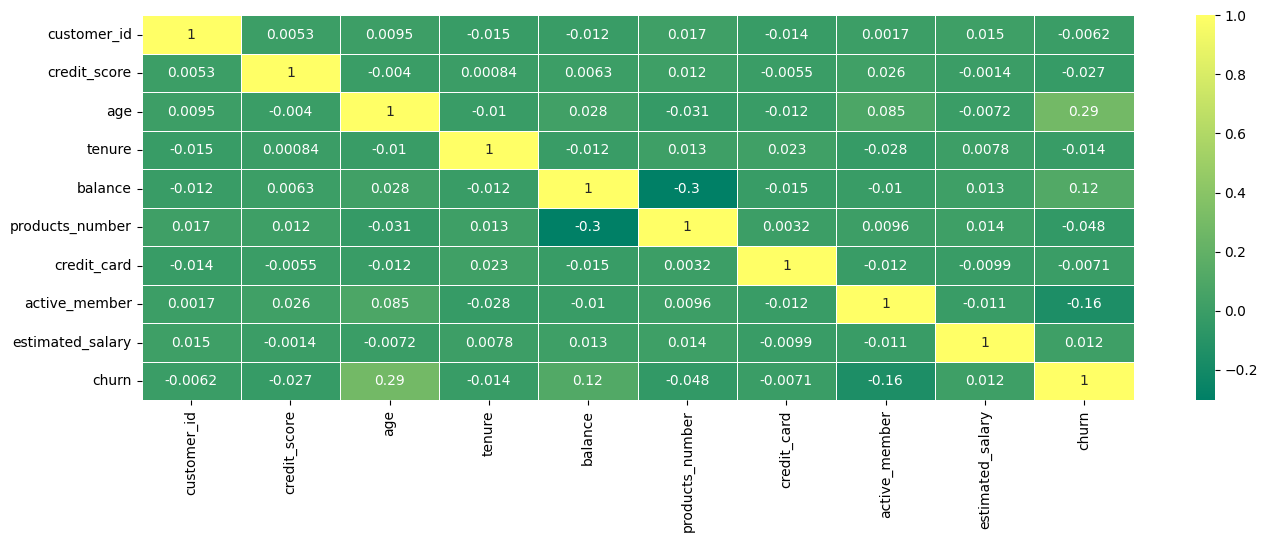

In [303]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidth=0.5,cmap='summer')
plt.show()

Check Outliers

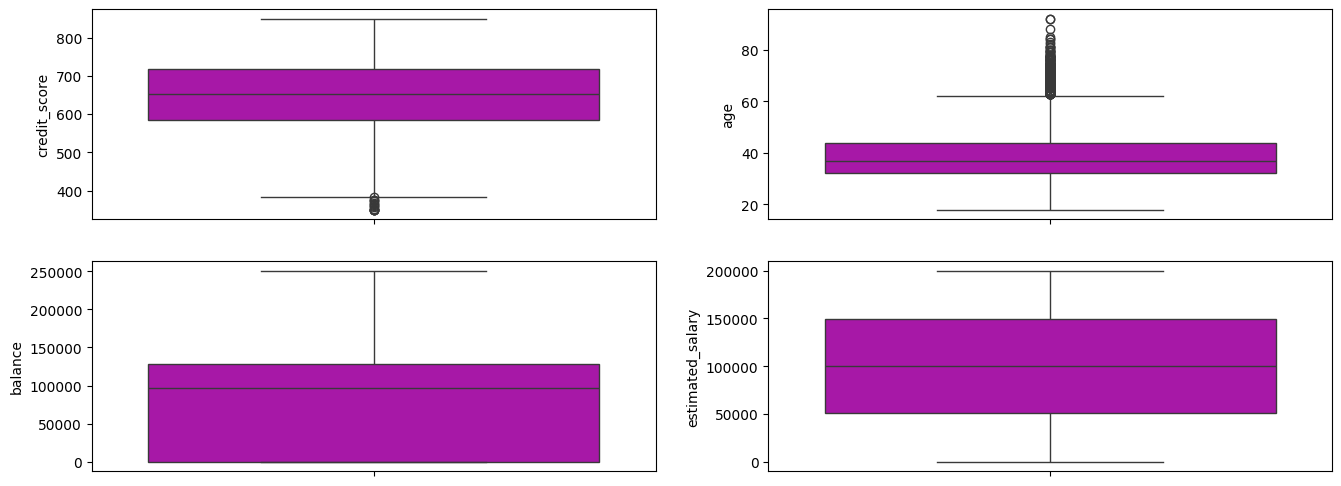

In [304]:
cols_to_plot=['credit_score','age','balance','estimated_salary']
fig,axes=plt.subplots(2,2,figsize=(16,6))
axes=axes.flatten()
for i ,col in enumerate(cols_to_plot):
  sns.boxplot(df[col],color='m',ax=axes[i])


Remove Irrelevant Feature

In [305]:
df.drop(columns='customer_id',inplace=True)

Train-Test-Split

In [306]:
X=df.drop(columns=['churn'])
y=df['churn']

In [307]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [308]:
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


In [309]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [310]:
X_train.shape

(8000, 10)

In [311]:
X_test.shape

(2000, 10)

Encode Categorical Data using ColumnTransformer

In [312]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [313]:
num=['age','credit_score','balance','estimated_salary']
cat=['country','gender']
transformer=ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),cat),
        ('num',StandardScaler(),num)

    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [314]:
X_train_transformed=transformer.fit_transform(X_train)
X_test_transformed=transformer.transform(X_test)

In [315]:
feature_names=transformer.get_feature_names_out()

In [316]:
feature_names

array(['country_Germany', 'country_Spain', 'gender_Male', 'age',
       'credit_score', 'balance', 'estimated_salary', 'tenure',
       'products_number', 'credit_card', 'active_member'], dtype=object)

# Class Distribution and Imbalance Check

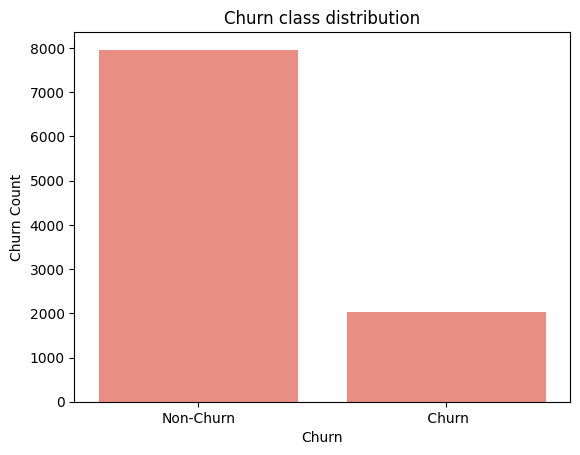

In [317]:
sns.countplot(data=df,x='churn',color='salmon')
plt.title('Churn class distribution')
plt.xlabel('Churn')
plt.ylabel('Churn Count')
plt.xticks([0,1],['Non-Churn',' Churn'])
plt.show()

Percentage of Churn And Non-Churn Customer

In [318]:
df['churn'].value_counts(normalize=True)*100

,proportion
churn,
0,79.63
1,20.37


# Support Vector Classifier

In [319]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
svc=SVC(kernel='rbf',C=20,gamma='scale',class_weight='balanced')
svc.fit(X_train_transformed,y_train)
svc_pred = svc.predict(X_test_transformed)
accuracy = accuracy_score(y_test, svc_pred)

print(f"Support Vector Accuracy:{accuracy*100:.2f}%")

Support Vector Accuracy:79.75%


In [320]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.50      0.74      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000



In [321]:
svc_cm=confusion_matrix(y_test,svc_pred)
svc_cm

array([[1295,  298],
       [ 107,  300]])

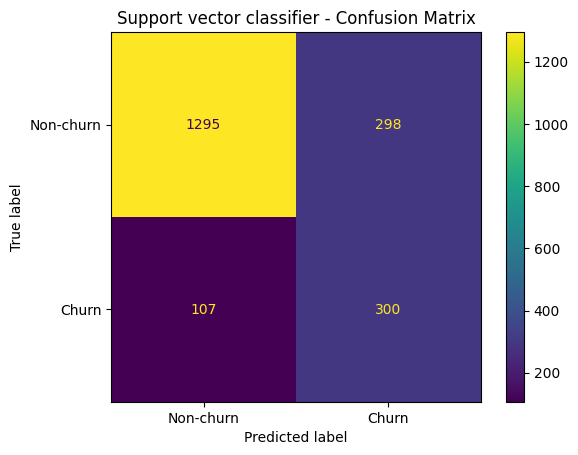

In [322]:
disp=ConfusionMatrixDisplay(
    confusion_matrix=svc_cm,
    display_labels=['Non-churn','Churn']
)
disp.plot()
plt.title('Support vector classifier - Confusion Matrix')
plt.show()

#Decision Tree Classifier

In [323]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(
    max_depth=7,
    max_features=0.8,
    min_samples_split=40,
    min_samples_leaf=40,
    class_weight={0:1,1:7},
    random_state=42
    )


dt.fit(X_train_transformed,y_train)
dt_pred = dt.predict(X_test_transformed)
accuracy = accuracy_score(y_test, dt_pred)

print(f" Decision Tree Accuracy: {accuracy*100:.2f}%")

 Decision Tree Accuracy: 71.15%


In [324]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      1593
           1       0.40      0.84      0.54       407

    accuracy                           0.71      2000
   macro avg       0.67      0.76      0.67      2000
weighted avg       0.83      0.71      0.74      2000



 Overfitting check : Train vs Test Performance

In [325]:
# Train accuracy check
y_train_pred = dt.predict(X_train_transformed)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test accuracy
test_accuracy = accuracy_score(y_test, dt_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Overfitting Gap: {(train_accuracy - test_accuracy):.4f}")

Train Accuracy: 0.7319
Test Accuracy: 0.7115
Overfitting Gap: 0.0204


In [326]:
dt_cm=confusion_matrix(y_test,dt_pred)
dt_cm

array([[1080,  513],
       [  64,  343]])

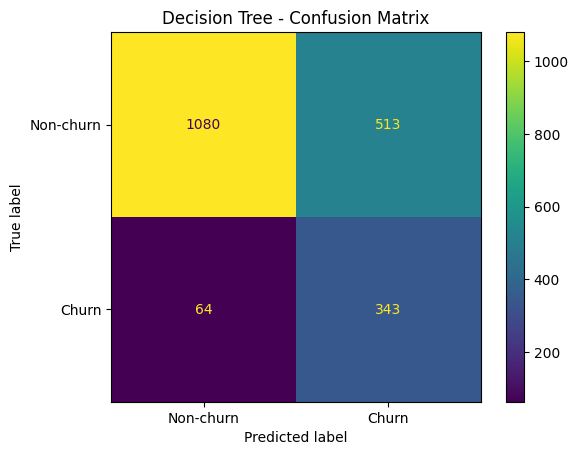

In [327]:
disp=ConfusionMatrixDisplay(
    confusion_matrix=dt_cm,
    display_labels=['Non-churn','Churn']
)
disp.plot()
plt.title('Decision Tree - Confusion Matrix')
plt.show()

# Random Forest

In [328]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    max_features=0.7,
    max_samples=0.7,
    min_samples_leaf=40,
    class_weight={0:1, 1:7},
    random_state=42
    )

rf.fit(X_train_transformed,y_train)
rf_pred = rf.predict(X_test_transformed)
accuracy = accuracy_score(y_test, rf_pred)

print(f'Random Forest Accuracy: {accuracy*100:.2f}%')

Random Forest Accuracy: 71.60%


In [329]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79      1593
           1       0.41      0.86      0.55       407

    accuracy                           0.72      2000
   macro avg       0.68      0.77      0.67      2000
weighted avg       0.84      0.72      0.74      2000



 Overfitting check : Train vs Test Performance

In [330]:
# Train accuracy check
y_train_pred = rf.predict(X_train_transformed)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test accuracy
test_accuracy = accuracy_score(y_test, rf_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Overfitting Gap: {(train_accuracy - test_accuracy):.4f}")

Train Accuracy: 0.7324
Test Accuracy: 0.7160
Overfitting Gap: 0.0164


In [331]:
rf_cm=confusion_matrix(y_test,rf_pred)
rf_cm

array([[1083,  510],
       [  58,  349]])

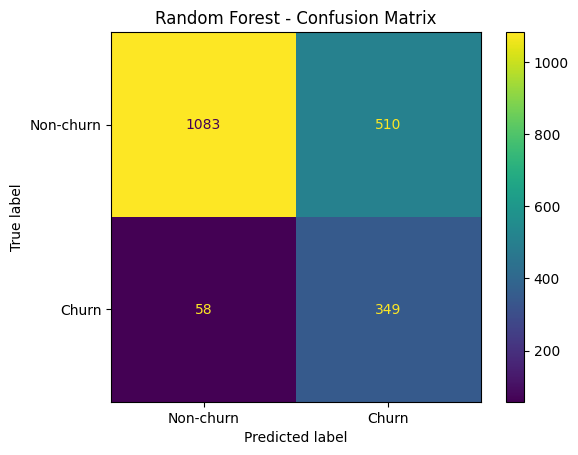

In [332]:
disp=ConfusionMatrixDisplay(
    confusion_matrix=rf_cm,
    display_labels=['Non-churn','Churn']
)
disp.plot()
plt.title('Random Forest - Confusion Matrix')
plt.show()

Feature Imporatance

In [333]:
importances=rf.feature_importances_
importances

array([0.05869811, 0.00416924, 0.0238194 , 0.41497746, 0.03157747,
       0.12731619, 0.03768286, 0.01579338, 0.22382622, 0.00195721,
       0.06018245])

In [334]:
feature_ranks=pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
}).sort_values('Importance',ascending=False)
feature_ranks

,Feature,Importance
3,age,0.414977
8,products_number,0.223826
5,balance,0.127316
10,active_member,0.060182
0,country_Germany,0.058698
6,estimated_salary,0.037683
4,credit_score,0.031577
2,gender_Male,0.023819
7,tenure,0.015793
1,country_Spain,0.004169


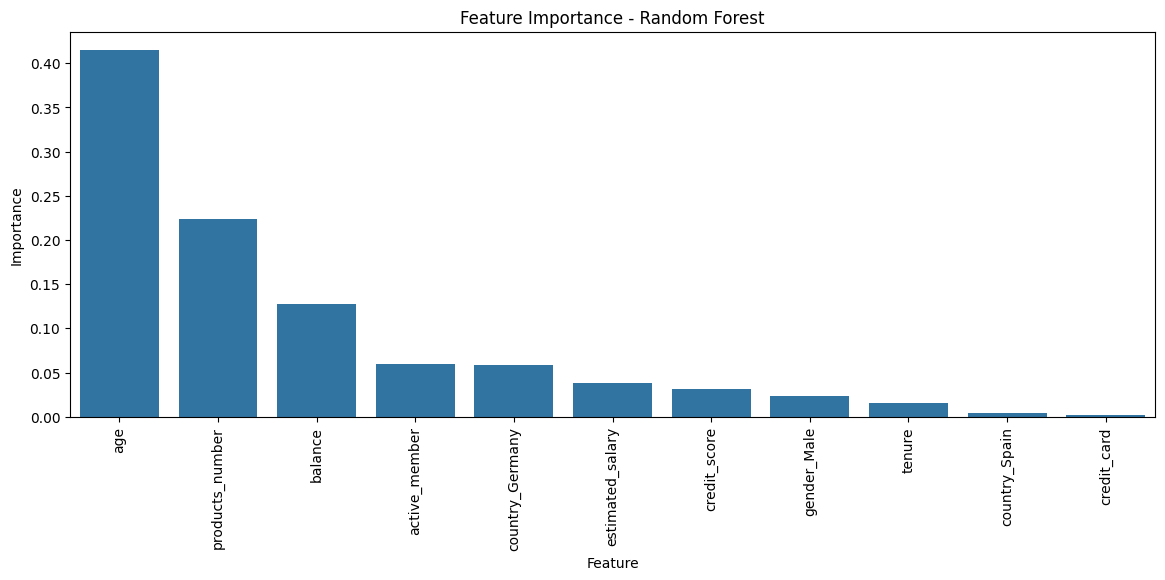

In [335]:
plt.figure(figsize=(14,5))
sns.barplot(data=feature_ranks,x='Feature',y='Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance - Random Forest')
plt.show()

# Model Comparison

In [336]:
from sklearn.metrics import recall_score,precision_score,f1_score

models = {
    'SVM': svc,
    'Decision Tree': dt,
    'Random Forest': rf,
}

results = {}
for name, model in models.items():
    preds = model.predict(X_test_transformed)

    results[name] = {
        "Accuracy": accuracy_score(y_test, preds)*100,
        "Precision": precision_score(y_test, preds)*100,
        "Recall": recall_score(y_test, preds)*100,
        "F1 Score": f1_score(y_test, preds)*100,

    }

results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
SVM,79.75,50.167224,73.710074,59.701493
Decision Tree,71.15,40.070093,84.275184,54.315123
Random Forest,71.60,40.628638,85.749386,55.134281
